In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [2]:
# загрузим датасет Iris

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
# Разделяем данные на обучающую и тестовую выборки:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Построим модель LDA и обучим ее на обучающей выборке:

lda = LDA()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [5]:
# Получим предсказания для тестовой выборки и центры классов:

y_pred = lda.predict(X_test)
centers = lda.means_

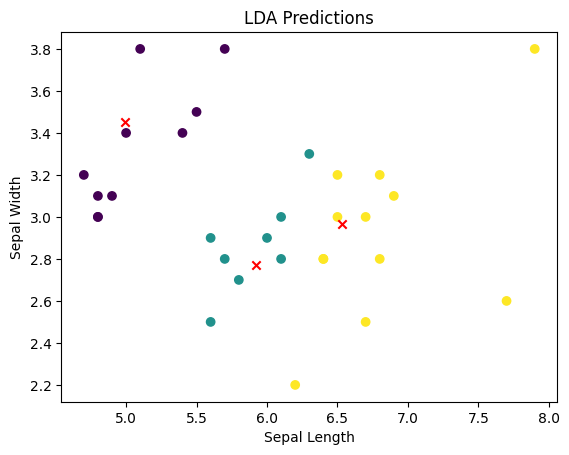

In [6]:
# Визуализируем предсказания для тестовой выборки и центры классов:

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('LDA Predictions')
plt.show()

In [7]:
# Отбросим целевую переменную и оставим только два признака - sepal_length и sepal_width:

X_new = iris.data[:, :2]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

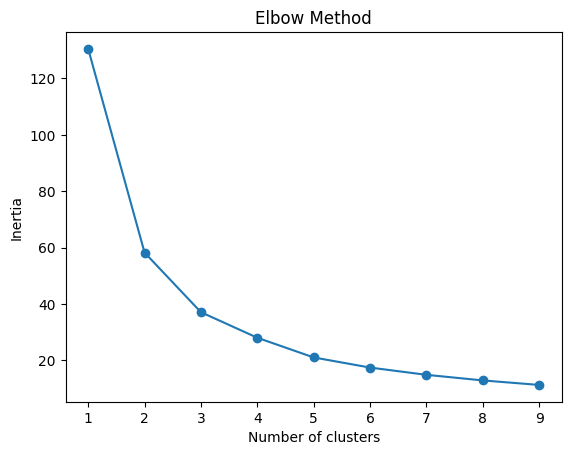

In [8]:
# Подберем оптимальное число кластеров для алгоритма KMeans используя метод локтя:

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_new)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


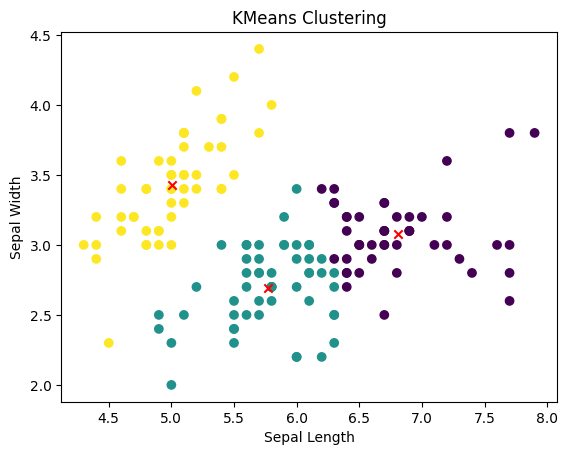

In [9]:
# Визуализируем полученную кластеризацию для оптимального числа кластеров:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_new)
labels = kmeans.labels_

plt.scatter(X_new[:, 0], X_new[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KMeans Clustering')
plt.show()

In [10]:
# Для задачи классификации вычислим метрику accuracy (должна быть больше 0,7):

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9
